In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from scipy import stats
import warnings
import numpy as np

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### 1. First, load the dataset

In [137]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [139]:
print(life_df.shape)
print(life_df.columns)
print(life_df.head())

(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.

### 2. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them. 

In [140]:
life_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


There are some values that seemingly are nonsensical. In the population column, Afghanistan's population is impossibly high one year. There are similar issues in other columns (BMI of 87 seems pretty unlikely),and we can see the spread of data above. To fix outliers and nonsensical values, we will be winsorizing our data later on.

In [141]:
life_df.isnull().sum()*100/life_df.count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.341530
infant deaths                       0.000000
Alcohol                             7.069971
percentage expenditure              0.000000
Hepatitis B                        23.186583
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.650908
Total expenditure                   8.333333
Diphtheria                          0.650908
 HIV/AIDS                           0.000000
GDP                                17.991968
Population                         28.521435
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     6.026705
Schooling                           5.873874
dtype: flo

From the above code, we can see that many columns have missing values. At most, a single column is missing roughly 30% of its values. We can fix this using interpolation going both ways.

In [142]:
fill_list = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
countries = life_df['Country'].unique()
for country in countries:
    life_df.loc[life_df["Country"] == country, fill_list] = life_df.loc[life_df["Country"] == country, fill_list].interpolate(limit_direction = 'both')

life_df.isnull().sum()*100/life_df.count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.341530
Adult Mortality                     0.341530
infant deaths                       0.000000
Alcohol                             0.581992
percentage expenditure              0.000000
Hepatitis B                         5.153901
Measles                             0.000000
 BMI                                1.170799
under-five deaths                   0.000000
Polio                               0.000000
Total expenditure                   1.101170
Diphtheria                          0.000000
 HIV/AIDS                           0.000000
GDP                                15.988946
Population                         28.296943
 thinness  1-19 years               1.170799
 thinness 5-9 years                 1.170799
Income composition of resources     6.026705
Schooling                           5.873874
dtype: flo

Unfortunately, population still is missing a large amount of its data. From our own intuitions, we may suspect that population may not have much of an effect on an individual's life expectancy. If we wanted to, we could find the exact values to plug in for the 800 missing rows, but since we will not be using population, we can drop them. GDP has had 2% of its missing rows filled, but we are still missing almost 16% of the data. We are going to drop the unfilled rows since we will still be left with a large amount of data. If we were so inclined, we could replace the missing values with the mean or median of the GDP column. This will, however, lead to peaky data.

In [143]:
life_df.dropna(inplace=True)
life_df.shape

(2128, 22)

### 3. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

First, we need to look at each column with data that may directly affect life expectancy. We want to remove outliers through winsorization if necessary. Below, we will go through each variable and apply winsorization where applicable. Feel free to scroll through quickly, as each variable will be explored individually.

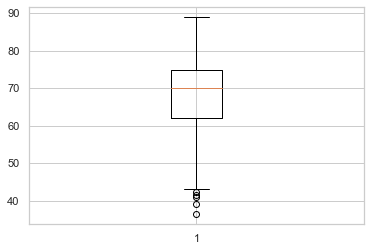

In [144]:
plt.boxplot(life_df['Life expectancy ']);
# we have some very low values here. We can winsorize them to get rid of outliers

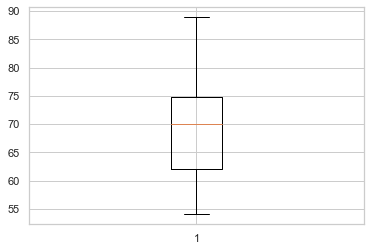

In [145]:
from scipy.stats.mstats import winsorize
life_df['winsorized_life'] = winsorize(life_df['Life expectancy '],(.1,0))
plt.boxplot(life_df['winsorized_life']);
# now we have no outliers

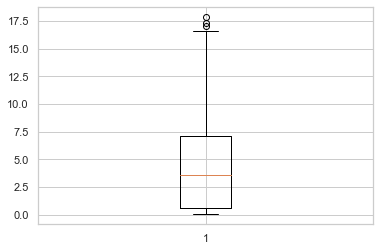

In [146]:
plt.boxplot(life_df['Alcohol']);
# alcohol has some high outliers that we can easily remove with winsorization

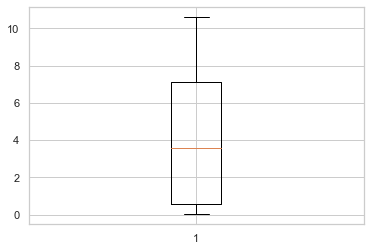

In [147]:
life_df['winsorized_alcohol'] = winsorize(life_df['Alcohol'],(0,.1))
plt.boxplot(life_df['winsorized_alcohol']);
# much better

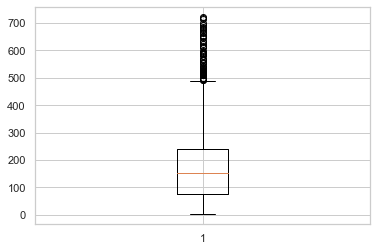

In [148]:
plt.boxplot(life_df['Adult Mortality']);
# extreme adult mortality outliers

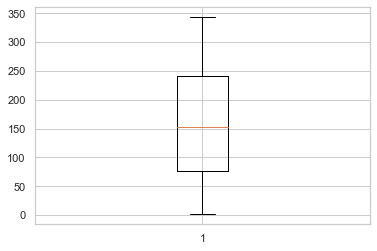

In [149]:
life_df['winsorized_adult_mortality'] = winsorize(life_df['Adult Mortality'], (0,.1))
plt.boxplot(life_df['winsorized_adult_mortality']);
# all better!

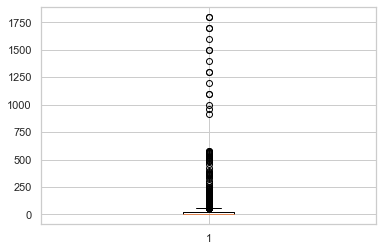

In [150]:
plt.boxplot(life_df['infant deaths']);
# the extremely high infant deaths can be somewhat solved via winsorization

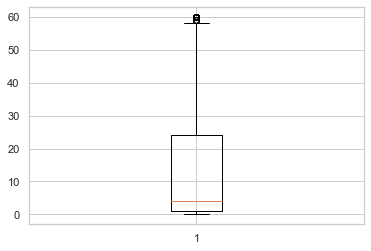

In [151]:
life_df['winsorized_infant_deaths'] = winsorize(life_df['infant deaths'],(0,.1))
plt.boxplot(life_df['winsorized_infant_deaths']);
# now we have far fewer outliers

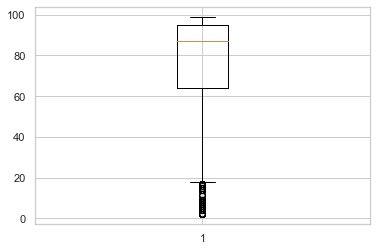

In [152]:
plt.boxplot(life_df['Hepatitis B']);
# we have some low hep b values

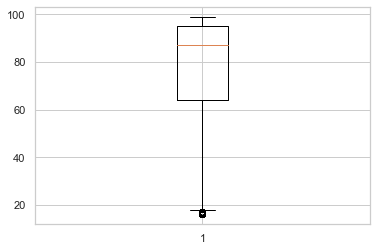

In [153]:
life_df['winsorized_hep_b'] = winsorize(life_df['Hepatitis B'],(.1,0))
plt.boxplot(life_df['winsorized_hep_b']);
# now we have many fewer

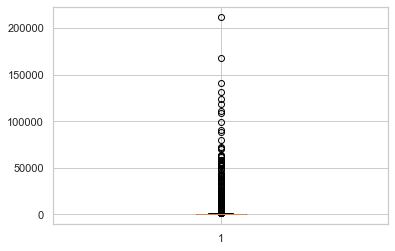

In [154]:
plt.boxplot(life_df['Measles ']);
# measles is problematic currently

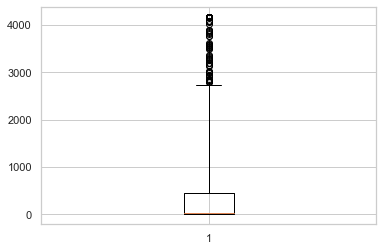

In [155]:
life_df['winsorized_measles'] = winsorize(life_df['Measles '],(0,.1))
plt.boxplot(life_df['winsorized_measles'], whis = 5);
# we still have some outliers, but far fewer than we did initially

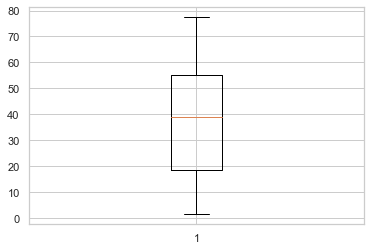

In [156]:
plt.boxplot(life_df[' BMI ']);
# BMI is good as is!

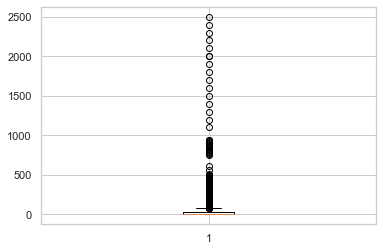

In [157]:
plt.boxplot(life_df['under-five deaths ']);
# winsorize these to solve a problem

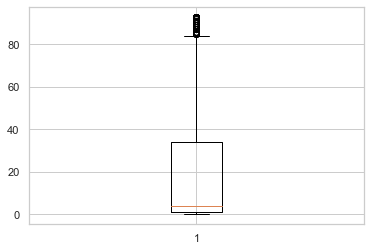

In [158]:
life_df['winsorized_five_deaths'] = winsorize(life_df['under-five deaths '], (0,.1))
plt.boxplot(life_df['winsorized_five_deaths']);
# now our data has fewer outliers

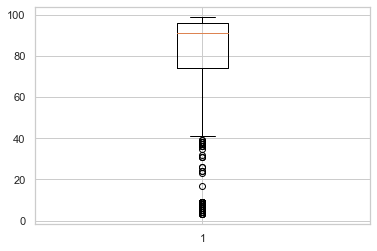

In [159]:
plt.boxplot(life_df['Polio']);
# winsorize polio in the same way

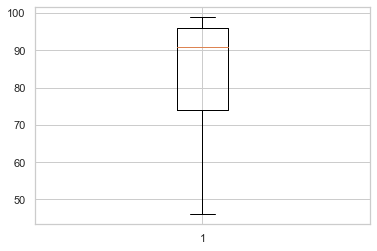

In [160]:
life_df['winsorized_polio'] = winsorize(life_df['Polio'],(.1,0))
plt.boxplot(life_df['winsorized_polio']);
# polio looks much better

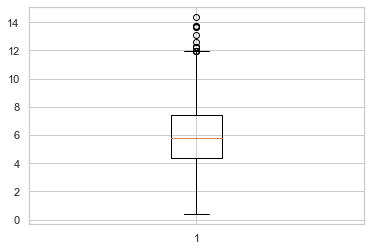

In [161]:
plt.boxplot(life_df['Total expenditure']);
# we don't have many outliers, but we can remove the ones we do have

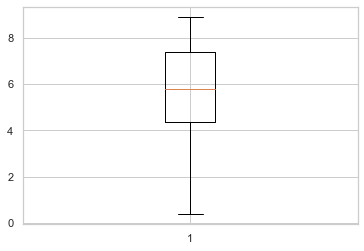

In [162]:
life_df['winsorized_expenditure'] = winsorize(life_df['Total expenditure'],(0,.1))
plt.boxplot(life_df['winsorized_expenditure']);
# no more outliers!

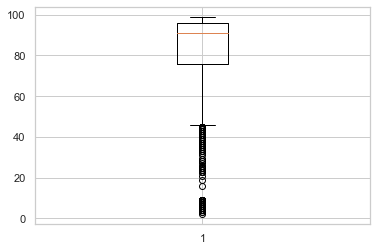

In [163]:
plt.boxplot(life_df['Diphtheria ']);
# we have some low values that are outliers

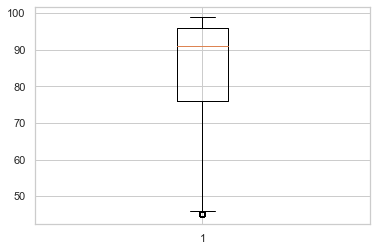

In [164]:
life_df['winsorized_diph'] = winsorize(life_df['Diphtheria '],(.1,0))
plt.boxplot(life_df['winsorized_diph']);
# now we have almost no outliers

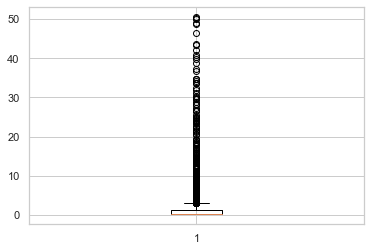

In [165]:
plt.boxplot(life_df[' HIV/AIDS']);
# lots of outliers here

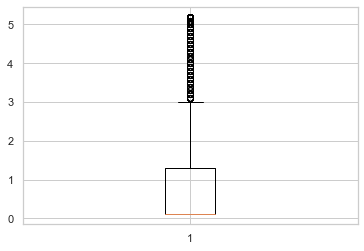

In [166]:
life_df['winsorized_aids'] = winsorize(life_df[' HIV/AIDS'],(0,.1))
plt.boxplot(life_df['winsorized_aids']);
# we still have some outliers, but not as many as before

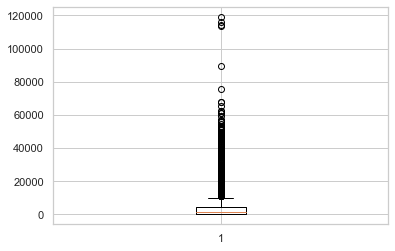

In [167]:
plt.boxplot(life_df['GDP']);
# as one may expect, we have some extreme gdp outliers

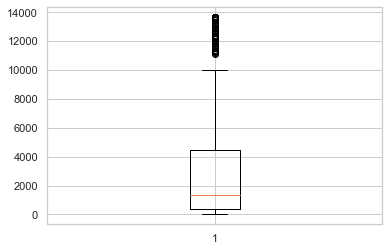

In [168]:
life_df['winsorized_gdp'] = winsorize(life_df['GDP'],(0,.1))
plt.boxplot(life_df['winsorized_gdp']);
# we still have outliers, but our spread looks better

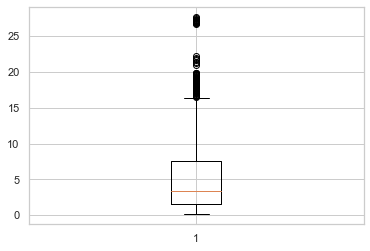

In [169]:
plt.boxplot(life_df[' thinness  1-19 years']);
# let's get rid of outliers and the ridiculous spacing of the column name!

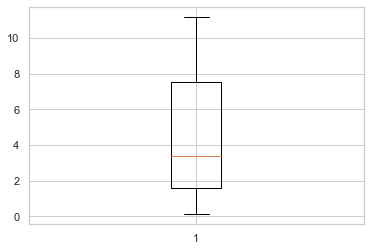

In [170]:
life_df['winsorized_thin_19'] = winsorize(life_df[' thinness  1-19 years'],(0,.1))
plt.boxplot(life_df['winsorized_thin_19']);
# no more outliers and no more spacing issues!

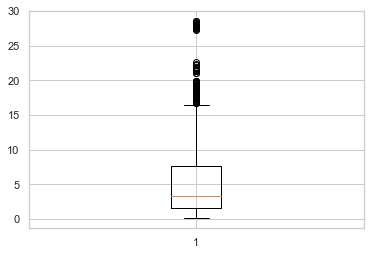

In [171]:
plt.boxplot(life_df[' thinness 5-9 years']);
# same issue here as with the previous thinness column

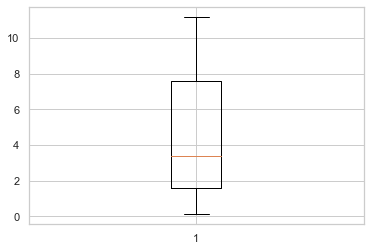

In [172]:
life_df['winsorized_thin_9'] = winsorize(life_df[' thinness 5-9 years'],(0,.1))
plt.boxplot(life_df['winsorized_thin_9']);
# no outliers, no spacing

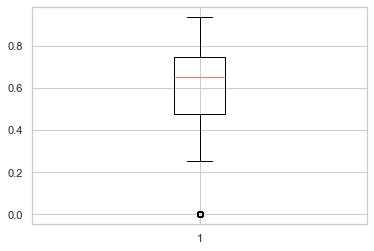

In [173]:
plt.boxplot(life_df['Income composition of resources']);
# we have a couple outliers, but since there are not many at all, we can leave this column as-is

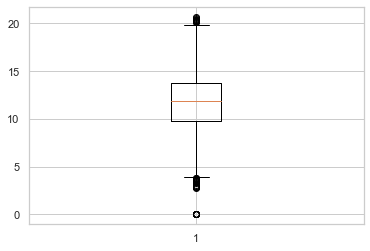

In [174]:
plt.boxplot(life_df['Schooling']);
# we have outliers on both ends, so let's winsorize

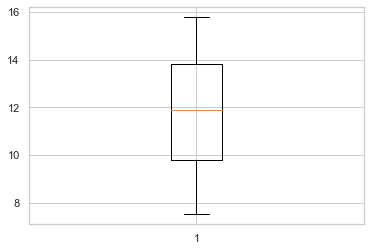

In [175]:
life_df['winsorized_school'] = winsorize(life_df['Schooling'],(.1,.1))
plt.boxplot(life_df['winsorized_school']);
# all outliers have been removed

We have now removed many of the outliers that plagued our initial data set. We can now confidently proceed into multivariate analysis and see how each of our variables affects life expectancy. Below, we will look at scatterplots of life expectancy paired with each variable.

In [176]:
life_updated = life_df[['Country','Year','Status','winsorized_life','winsorized_adult_mortality','winsorized_infant_deaths','winsorized_alcohol','winsorized_hep_b','winsorized_measles',' BMI ','winsorized_five_deaths','winsorized_polio','winsorized_expenditure','winsorized_diph','winsorized_aids','winsorized_gdp','Population','winsorized_thin_19','winsorized_thin_9','Income composition of resources','winsorized_school']]
life_updated.shape

(2128, 21)

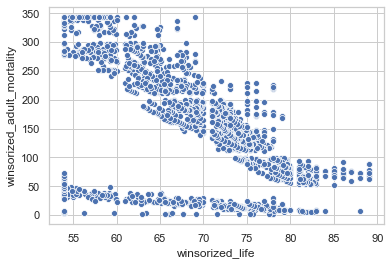

In [177]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_adult_mortality']);
# looks to be a strong negative correlation

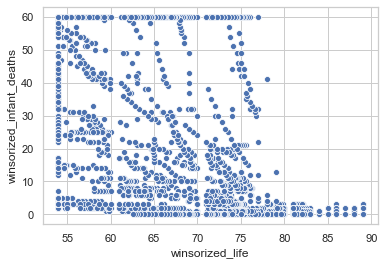

In [178]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_infant_deaths']);
# negative correlation is somewhat apparent

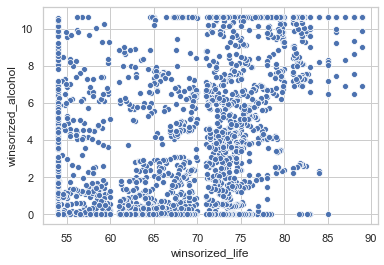

In [179]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_alcohol']);
# the correlation here is hard to see. It looks positive, but we will need to see the correlation value later

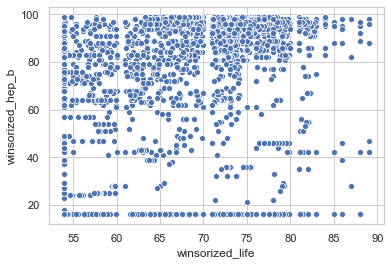

In [180]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_hep_b']);
# perhaps there is a positive correlation, but it is hard to tell

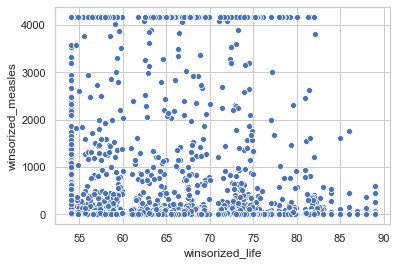

In [181]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_measles']);


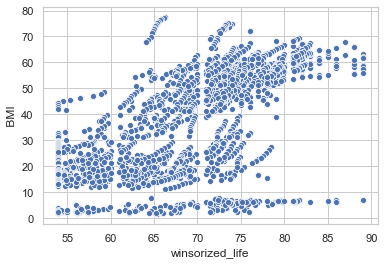

In [182]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated[' BMI ']);
# looks to be a positive correlation

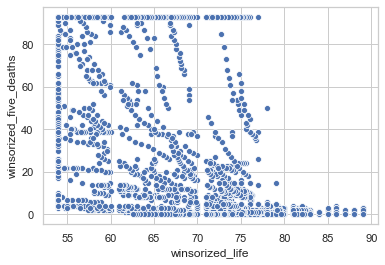

In [183]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_five_deaths']);
# as intuition would dictate, we have a negative correlation

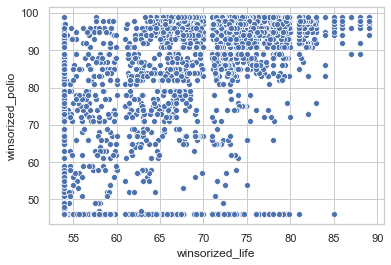

In [184]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_polio']);
# somewhat positive correlation

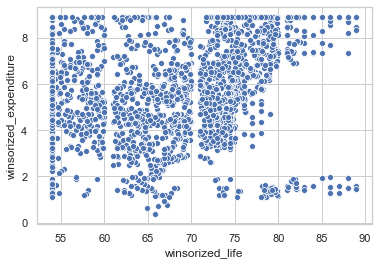

In [185]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_expenditure']);
# difficult to tell, but could be a positive correlation

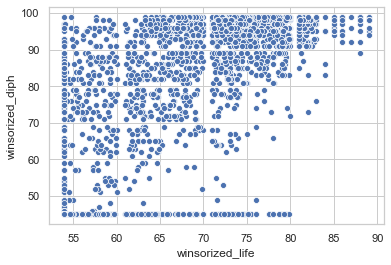

In [186]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_diph']);
# positive correlation is apparent

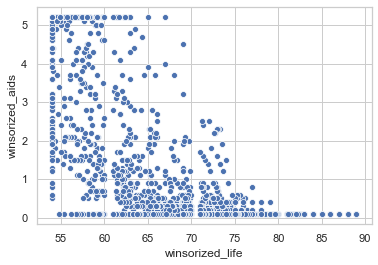

In [187]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_aids']);
# looks to be a negative correlation

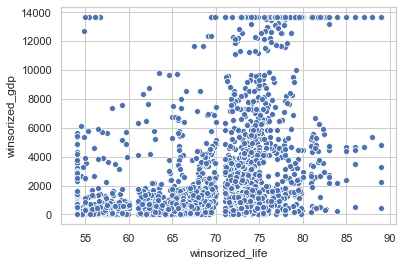

In [188]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_gdp']);
# we look to have a positive correlation here

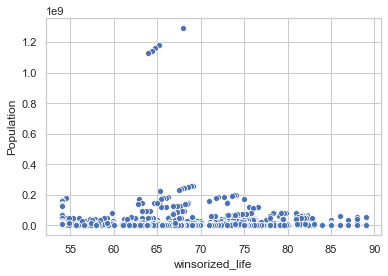

In [189]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['Population']);
# no strong correlation to be seen
# we can also see some nonsensical values

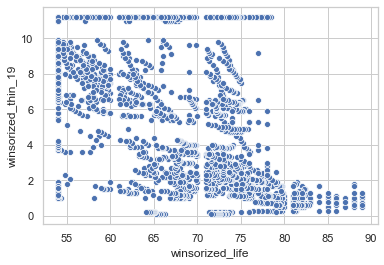

In [190]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_thin_19']);
# we have a negative correlation

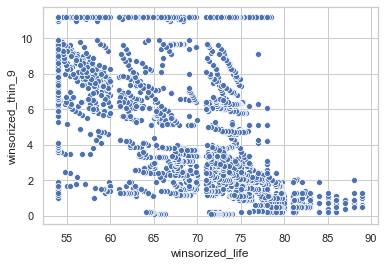

In [191]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_thin_9']);
# another negative correlation
# this is in line with the negative correlation observed with the previous thinness variable

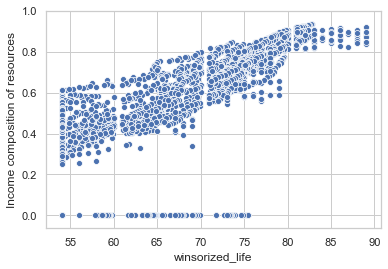

In [192]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['Income composition of resources']);
# we look to have a pretty strong correlation

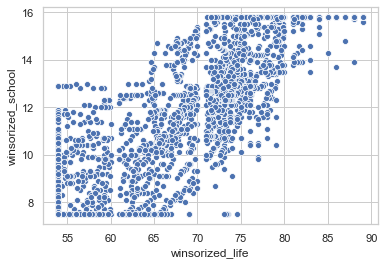

In [193]:
sns.scatterplot(x=life_updated['winsorized_life'],y=life_updated['winsorized_school']);
# a clearly positive correlation

From all of our scatterplots above, we can see the correlation each variable has with life expectancy. To verify our visual interpretations, we can also view the correlation matrix.

In [194]:
life_updated.corr()

,Year,winsorized_life,winsorized_adult_mortality,winsorized_infant_deaths,winsorized_alcohol,winsorized_hep_b,winsorized_measles,BMI,winsorized_five_deaths,winsorized_polio,winsorized_expenditure,winsorized_diph,winsorized_aids,winsorized_gdp,Population,winsorized_thin_19,winsorized_thin_9,Income composition of resources,winsorized_school
Year,1.000000,0.158360,-0.042364,-0.052647,-0.084075,0.247606,-0.163918,0.105160,-0.060166,0.128021,0.045192,0.164581,-0.112456,0.173457,0.016334,-0.052536,-0.051593,0.247605,0.205341
winsorized_life,0.158360,1.000000,-0.635397,-0.525502,0.417195,0.271288,-0.246582,0.610284,-0.547748,0.524950,0.242609,0.533079,-0.744895,0.559689,-0.016269,-0.594038,-0.590533,0.749262,0.795230
winsorized_adult_mortality,-0.042364,-0.635397,1.000000,0.305239,-0.209705,-0.113050,0.101904,-0.388996,0.315665,-0.281157,-0.156954,-0.276605,0.493232,-0.319764,-0.015955,0.375482,0.384858,-0.437002,-0.454573
winsorized_infant_deaths,-0.052647,-0.525502,0.305239,1.000000,-0.287067,-0.191888,0.550320,-0.469330,0.993163,-0.373558,-0.190582,-0.365111,0.342726,-0.338019,0.254928,0.408335,0.429787,-0.394678,-0.534439
winsorized_alcohol,-0.084075,0.417195,-0.209705,-0.287067,1.000000,0.112087,-0.127099,0.374458,-0.284142,0.282755,0.250887,0.286573,-0.081109,0.533319,-0.023244,-0.424415,-0.413997,0.522623,0.593796
winsorized_hep_b,0.247606,0.271288,-0.113050,-0.191888,0.112087,1.000000,-0.208664,0.200444,-0.203640,0.532421,0.141941,0.605298,-0.261878,0.095354,-0.087776,-0.155633,-0.167212,0.256109,0.290911
winsorized_measles,-0.163918,-0.246582,0.101904,0.550320,-0.127099,-0.208664,1.000000,-0.284163,0.552797,-0.248655,-0.184490,-0.238119,0.124695,-0.168690,0.243038,0.255686,0.264731,-0.186857,-0.288484
BMI,0.105160,0.610284,-0.388996,-0.469330,0.374458,0.200444,-0.284163,1.000000,-0.486063,0.313343,0.243884,0.310578,-0.427385,0.414102,-0.067928,-0.608867,-0.621368,0.542882,0.617624
winsorized_five_deaths,-0.060166,-0.547748,0.315665,0.993163,-0.284142,-0.203640,0.552797,-0.486063,1.000000,-0.391705,-0.188403,-0.384633,0.366308,-0.342220,0.248208,0.417670,0.432061,-0.417495,-0.551013
winsorized_polio,0.128021,0.524950,-0.281157,-0.373558,0.282755,0.532421,-0.248655,0.313343,-0.391705,1.000000,0.199467,0.836373,-0.397564,0.301050,-0.051540,-0.290333,-0.287262,0.473699,0.527565


Our interpretations of the previous graphs matches the correlations seen in the above matrix. For our next step where we apply PCA to our data, we will want to choose only those variables that have a correlation greater than 0 and less than .8.

### 4. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

The variables we will investigate will be: alcohol, hepatitis b, BMI, expenditure, and GDP. None of our selected variables have correlations with other variables greater than .8 or less than 0. Therefore, we are cutting down to 5 variables.

In [221]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = life_updated[['winsorized_alcohol','winsorized_hep_b',' BMI ','winsorized_expenditure','winsorized_gdp']]
X = StandardScaler().fit_transform(X)

sklearn_pca = PCA(n_components=5)
new_df = pd.DataFrame(sklearn_pca.fit_transform(X),columns=['pca_1', 'pca_2', 'pca_3', 'pca_4','pca_5'])
print(sklearn_pca.explained_variance_ratio_)

[0.41859454 0.19572486 0.16401291 0.12921294 0.09245475]


We have now reduced our dimensionality from 21 to 5. Of our 5 newly engineered components, the first component is responsible for 41.9% of the variance observed; the second component is responsible for 19.6% of the variance observed; the third component is responsible for 16.4% of the variance observed; the fourth component is responsible for 12.9% of the observed variance; and the fifth component is responsible for 9.2% of the observed variance.

### 5. Summarize your findings.

After starting with a large amount of data with some very unrealistic outliers, we have now reduced our initial dataset to 5 components that can explain the variance in life expectancy. We are now well on our way to being able to make life expectancy predictions for completely new points of data (e.g., what will the US life expectancy be in 2020?).